# Flight Price Prediction

# Data Description

Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

# Importing required Libariries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None)

# Importing Dataset

In [3]:
df=pd.read_excel('C:\\Users\\Jayasurya E\\OneDrive\\Desktop\\Data_Train.xlsx')
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [4]:
ds=pd.read_excel('C:\\Users\\Jayasurya E\\OneDrive\\Desktop\\Test_set.xlsx')
ds.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [5]:
df.info() #check the information of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
ds.info() #check the information about test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [7]:
df.shape #check the data dimension

(10683, 11)

We have 10683 rows and 11 columns including the target column.

In [8]:
ds.shape #check the data dimension

(2671, 10)

We have 2671 rows and 10 columns excluding the target column.

In [9]:
df.columns    # checking the variables in column section.

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
df['Price'].value_counts() # checking the value counts of Target variable

10262    258
10844    212
7229     162
4804     160
4823     131
14714    109
3943     104
15129     93
3841      91
12898     86
3597      86
14781     84
9663      84
3873      80
12373     77
14151     74
8586      70
4174      69
5678      65
10368     63
6442      60
8016      60
3100      58
11087     57
14571     57
13014     57
13941     57
2754      56
4423      53
4544      51
14388     49
13377     49
4668      49
7832      47
3543      45
3419      43
8372      43
13067     42
13587     42
7480      41
7064      40
2227      40
13376     39
8040      39
9646      38
4049      38
6961      37
15554     36
13292     36
1965      36
16079     36
2017      35
4995      35
13817     35
4878      34
13029     33
5228      32
4148      32
14871     31
3383      31
12692     30
6093      30
4591      29
5403      29
4409      29
3625      29
4030      29
11467     29
5192      28
8452      28
6795      27
6144      27
8610      27
13727     26
7408      26
8529      26
9314      25

In [11]:
df['Airline'].value_counts()  # checking the value counts of Airlines.

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Graphical Representation

In [12]:
df['Price'].mean()  #Check the mean value for Flight Ticket Price

9087.064120565385

Text(0.5, 1.0, 'Flight Ticket Price Prediction')

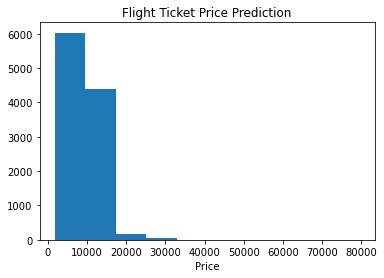

In [13]:
#Histogram plot for Price of the data.
plt.hist(df['Price'])
plt.xlabel('Price')
plt.title('Flight Ticket Price Prediction')

<AxesSubplot:title={'center':'Flight Ticket Price'}, xlabel='Price', ylabel='Density'>

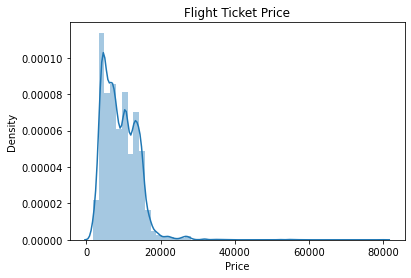

In [14]:
#Distplot for Price of data.
plt.title('Flight Ticket Price')
sns.distplot(df['Price'],kde=True)

The distplot clears that flight ticket price distribution of flight is lies between 10,000 to 20,000.

<AxesSubplot:title={'center':'Airline vs Price'}, xlabel='Airline', ylabel='Price'>

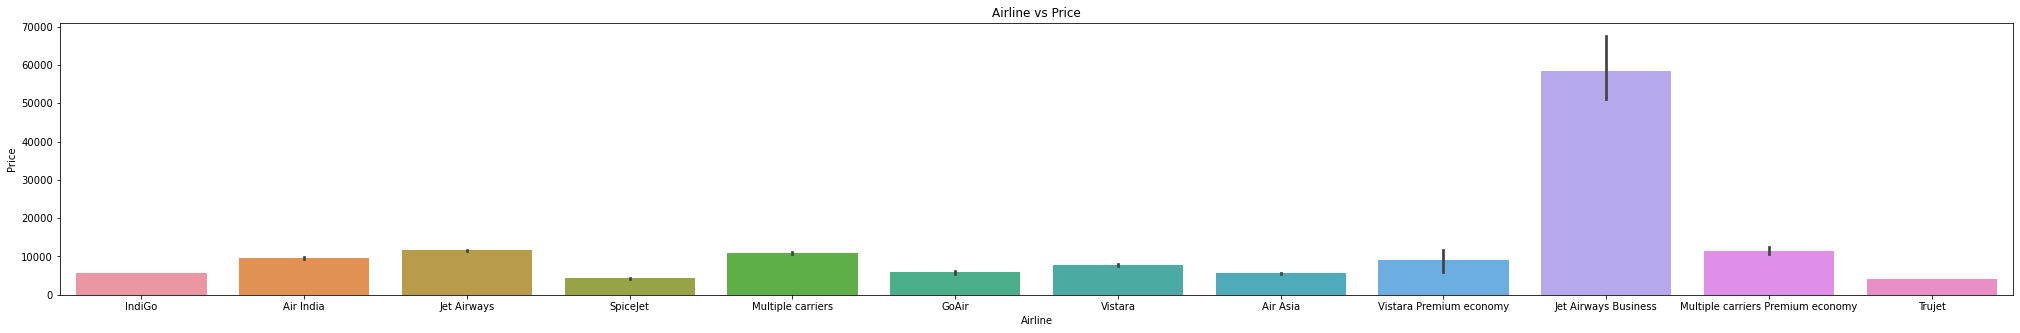

In [15]:
# Barplot Display distribution of data across all level of category
plt.figure(figsize=(35,5))
plt.title('Airline vs Price')
sns.barplot(x='Airline',y='Price',data=df)

Just by observing above graph, the Jet Airways Business Airlines price is high when compared to other premium airlines.

<AxesSubplot:title={'center':'Counts of Airlines'}, xlabel='Airline', ylabel='count'>

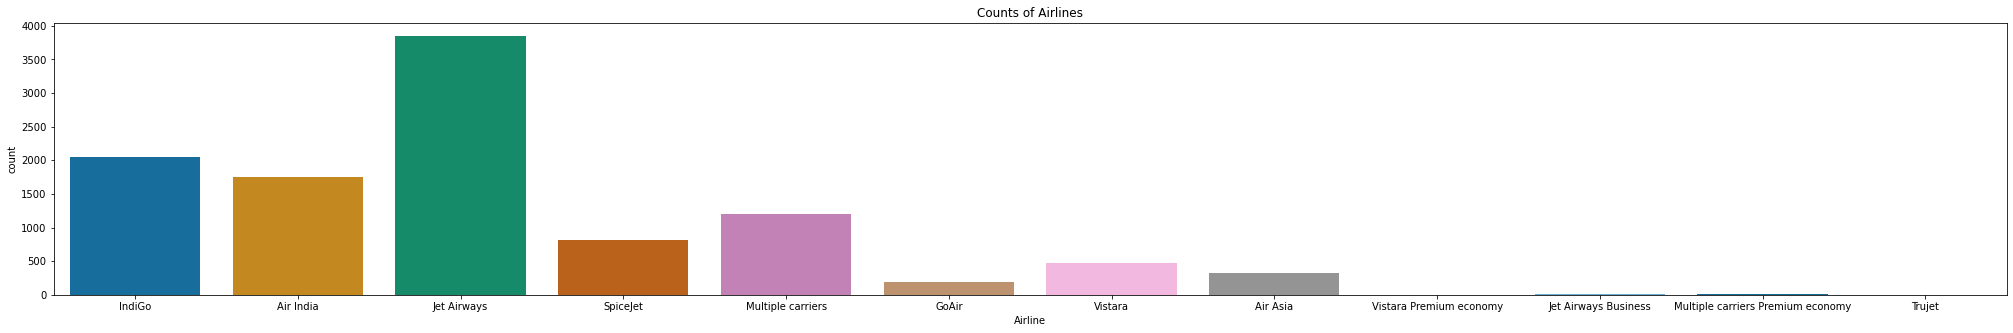

In [17]:
# Countplot Display distribution of data across all level of category
plt.subplots(figsize=(35,5))
plt.title('Counts of Airlines')
sns.countplot(x='Airline',data=df,palette='colorblind')

The Jet Airways has more number flights but Vistara Premium economy,Jet Airways Business & Turget have almost less flights.

Text(0, 0.5, 'Price')

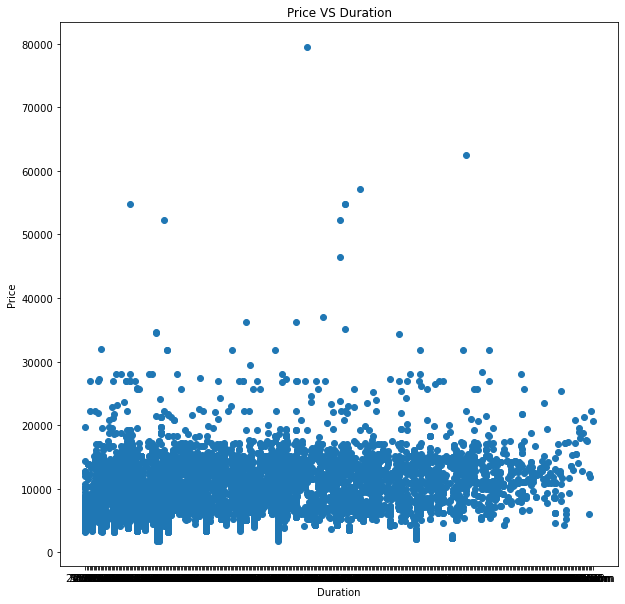

In [18]:
# Barplot Display distribution of data across Price vs Duration.
plt.figure(figsize = (10, 10))
plt.title('Price VS Duration')
plt.scatter(df['Duration'],df['Price'])
plt.xlabel('Duration')
plt.ylabel('Price')

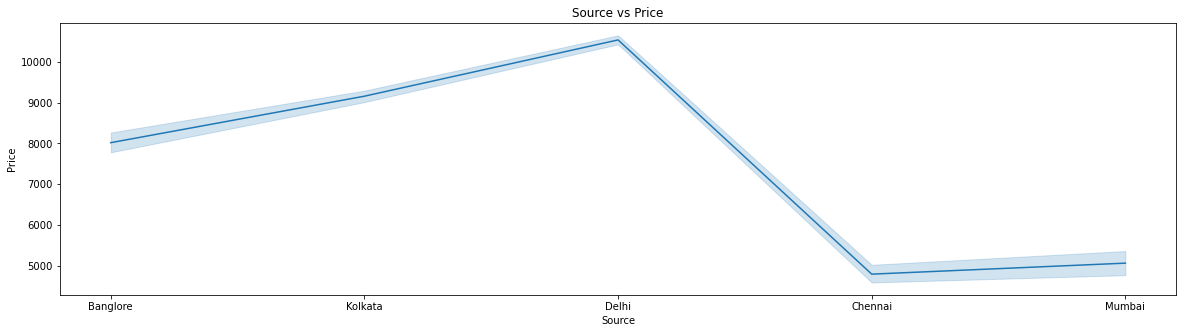

In [19]:
# Lineplot Display distribution of data across Source vs Price
plt.figure(figsize=(20,5))
plt.title('Source vs Price')
sns.lineplot(x='Source',y='Price',data=df)
plt.show()

The Delhi Source has high price range & low at Chennai source.

Text(0, 0.5, 'Price')

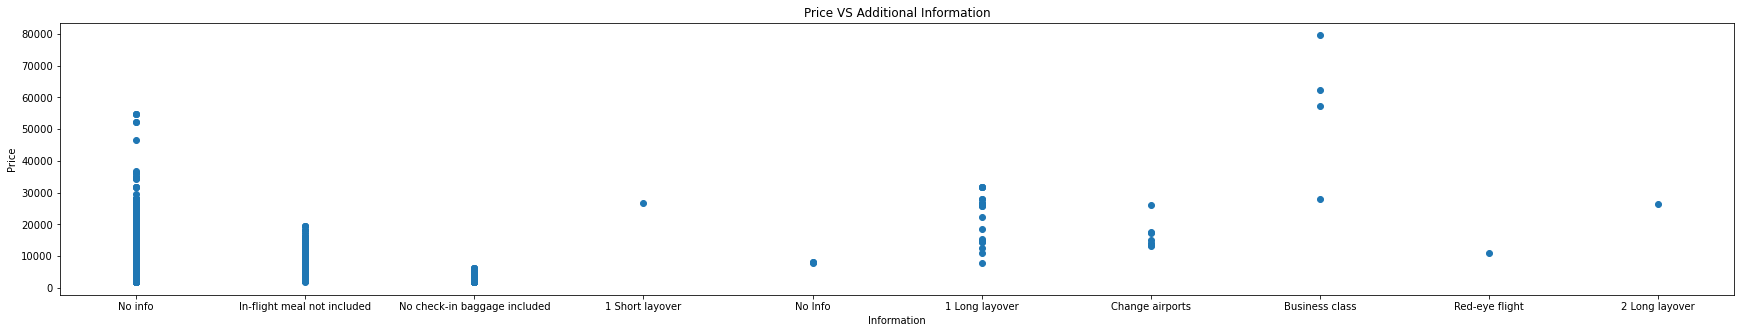

In [20]:
# Barplot Display distribution of data across Price vs Additional_Info.
plt.figure(figsize=(30,5))
plt.title('Price VS Additional Information')
plt.scatter(df['Additional_Info'], df['Price'])
plt.xlabel('Information')
plt.ylabel('Price')

From above scatter plot is it clear the price is high for Bussiness class.

<AxesSubplot:title={'center':'Flight Ticket Price'}, xlabel='Price'>

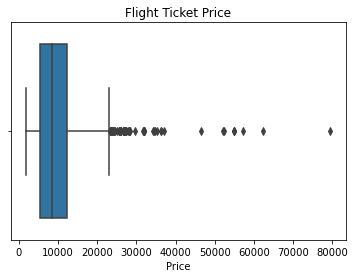

In [21]:
# Boxplot Display distribution of data across  Price for all level of category
plt.title('Flight Ticket Price')
sns.boxplot(df['Price'])

As we can see that there are some points which are seeems like outliers but we cannot remove them because these includes flight ticket price also.

Graphical Representation Conclusion

The columns that are going to be drop are Date of journey,Route, Departure Time, Arrival Time,Duration.They are strings,cannot be categorized and don't contribute much to the outcome.

# Preprocessing

In [22]:
df.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'], axis = 1, inplace = True)

In [23]:
df.describe() #statistics summary for numerical columns

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

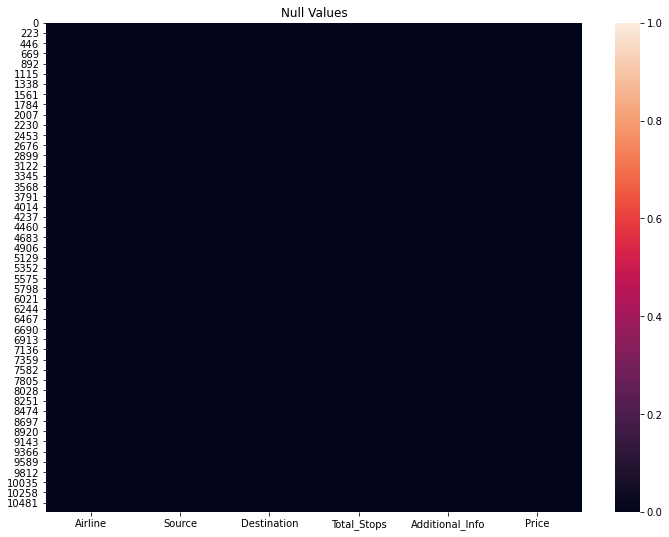

In [24]:
# Heatmap for Null value for data.
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [26]:
#Check the null values in dataset
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [27]:
#filling the missing values for categorical terms by mode
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [28]:
#Filled the null values in dataset
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Converting all Object attributes into Numerical attributes by using LabelEncoder

In [29]:
df.head()   # informtion about top of the data.

Airline    Source Destination Total_Stops Additional_Info  Price
0       IndiGo  Banglore   New Delhi    non-stop         No info   3897
1    Air India   Kolkata    Banglore     2 stops         No info   7662
2  Jet Airways     Delhi      Cochin     2 stops         No info  13882
3       IndiGo   Kolkata    Banglore      1 stop         No info   6218
4       IndiGo  Banglore   New Delhi      1 stop         No info  13302

# Checking the unique data in columns section

In [30]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [31]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [32]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [33]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [34]:
df['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [35]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [36]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [37]:
df.head()    # informtion about top of the data after label encoder.

Airline  Source  Destination  Total_Stops  Additional_Info  Price
0        3       0            5            4                8   3897
1        1       3            0            1                8   7662
2        4       2            1            1                8  13882
3        3       3            0            0                8   6218
4        3       0            5            0                8  13302

In [38]:
df.describe()

Airline        Source   Destination   Total_Stops  \
count  10683.000000  10683.000000  10683.000000  10683.000000   
mean       3.965927      1.952261      1.436113      1.458111   
std        2.352155      1.177221      1.474782      1.806290   
min        0.000000      0.000000      0.000000      0.000000   
25%        3.000000      2.000000      0.000000      0.000000   
50%        4.000000      2.000000      1.000000      0.000000   
75%        4.000000      3.000000      2.000000      4.000000   
max       11.000000      4.000000      5.000000      4.000000   

       Additional_Info         Price  
count     10683.000000  10683.000000  
mean          7.393054   9087.064121  
std           1.214211   4611.359167  
min           0.000000   1759.000000  
25%           8.000000   5277.000000  
50%           8.000000   8372.000000  
75%           8.000000  12373.000000  
max           9.000000  79512.000000

<AxesSubplot:>

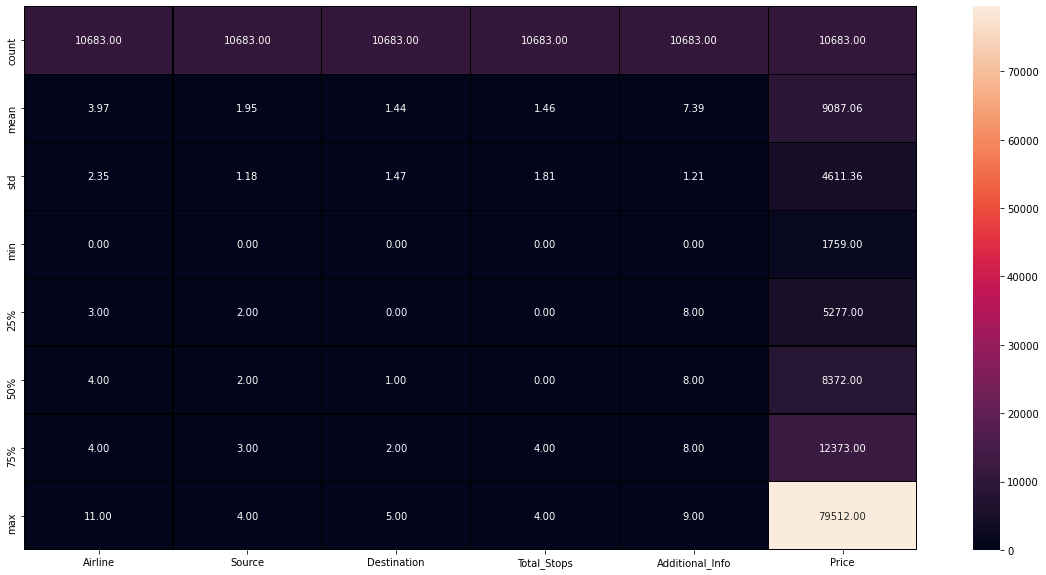

In [39]:
# Heatmap Display distribution of data across all level of category

plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Correlation Matrix

In [40]:
dfcor=df.corr()
dfcor

Airline    Source  Destination  Total_Stops  \
Airline          1.000000 -0.013401     0.018479     0.036064   
Source          -0.013401  1.000000    -0.592574    -0.225601   
Destination      0.018479 -0.592574     1.000000     0.337883   
Total_Stops      0.036064 -0.225601     0.337883     1.000000   
Additional_Info -0.060802 -0.022107     0.026806     0.164009   
Price           -0.039520  0.015998    -0.071112    -0.571174   

                 Additional_Info     Price  
Airline                -0.060802 -0.039520  
Source                 -0.022107  0.015998  
Destination             0.026806 -0.071112  
Total_Stops             0.164009 -0.571174  
Additional_Info         1.000000 -0.065478  
Price                  -0.065478  1.000000

<AxesSubplot:>

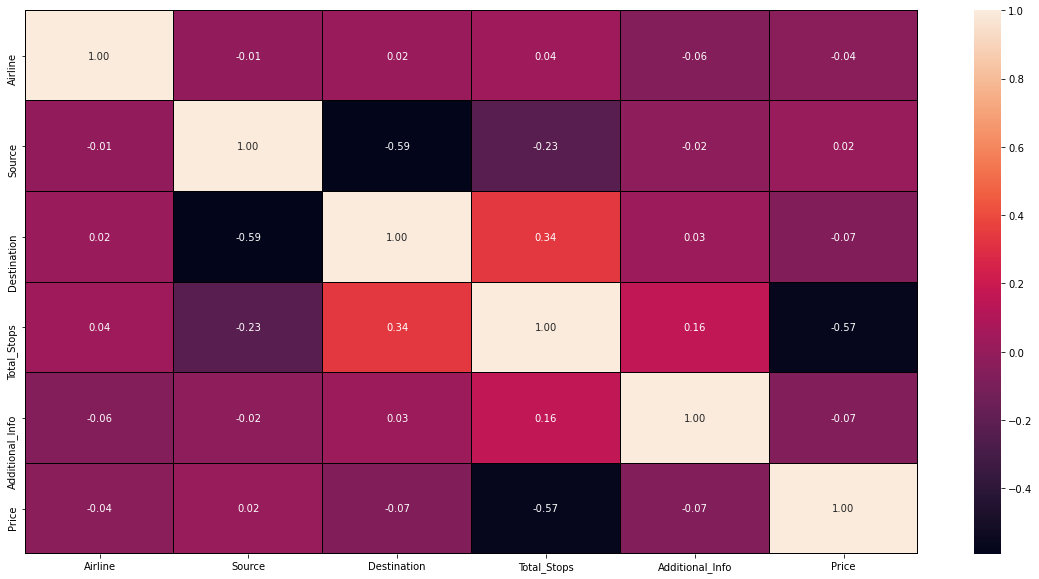

In [41]:
# Heatmap Display distribution of data across all level of category

plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Removing Outliers from the Dataset

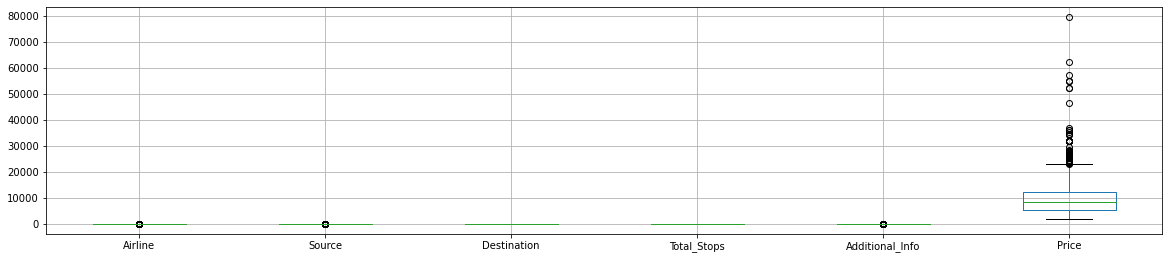

In [43]:
# Boxplot Display distribution of data across all level of category
df.boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [44]:
from scipy.stats import zscore

In [45]:
z=np.abs(zscore(df))
z

array([[0.41067545, 1.65844074, 2.41666505, 1.4073085 , 0.49989167,
        1.12554821],
       [1.26099927, 0.89005213, 0.97382594, 0.25363166, 0.49989167,
        0.30904789],
       [0.01448647, 0.04055451, 0.29572775, 0.25363166, 0.49989167,
        1.03985835],
       ...,
       [0.01448647, 1.65844074, 0.38237045, 1.4073085 , 0.49989167,
        0.40295085],
       [2.56545795, 1.65844074, 2.41666505, 1.4073085 , 0.49989167,
        0.77224576],
       [1.26099927, 0.04055451, 0.29572775, 0.25363166, 0.49989167,
        0.57815073]])

In [46]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

Airline  Source  Destination  Total_Stops  Additional_Info  Price
0        3       0            5            4                8   3897
1        1       3            0            1                8   7662
2        4       2            1            1                8  13882
3        3       3            0            0                8   6218
4        3       0            5            0                8  13302

In [47]:
df.shape

(10683, 6)

In [48]:
df_new.shape

(10578, 6)

In [49]:
Data_loss=((10683-10578)/10683*100)
Data_loss

0.9828699803426004

# Check Skewness in  dataset

In [50]:
df.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Total_Stops        0.631681
Additional_Info   -1.779838
Price              1.812552
dtype: float64

In [51]:
x= df.drop('Price',axis=1)
y= df['Price']

In [52]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [53]:
df_new.skew()

Airline           -0.015312
Source            -0.238259
Destination        0.041560
Total_Stops        0.325203
Additional_Info   -1.372067
dtype: float64

In [54]:
x=df_new
x.head()

Airline    Source  Destination  Total_Stops  Additional_Info
0 -0.295500 -1.599712     1.752703     1.293592         0.524703
1 -1.420300  0.902061    -1.370545     0.355606         0.524703
2  0.147745 -0.012108     0.005861     0.355606         0.524703
3 -0.295500  0.902061    -1.370545    -0.905745         0.524703
4 -0.295500 -1.599712     1.752703    -0.905745         0.524703

# Regression Method

# Linear Regression Model

In [55]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [56]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.2495166001592003
At random state 0,the testing accuracy is:0.2464603942350675


At random state 1,the training accuracy is:0.24275816255262828
At random state 1,the testing accuracy is:0.24863083481373627


At random state 2,the training accuracy is:0.2543552453451361
At random state 2,the testing accuracy is:0.2447466238797248


At random state 3,the training accuracy is:0.2541857325487319
At random state 3,the testing accuracy is:0.24389408431281756


At random state 4,the training accuracy is:0.23791098948339917
At random state 4,the testing accuracy is:0.2511790954379074


At random state 5,the training accuracy is:0.2398410690821262
At random state 5,the testing accuracy is:0.250548261073838


At random state 6,the training accuracy is:0.24799362357125043
At random state 6,the testing accuracy is:0.24724819412122423


At random state 7,the training accuracy is:0.2482866668155942
At random state 7,the testing accuracy is:0.24737449976022

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=6)
lr.fit(x_train,y_train)

LinearRegression()

In [58]:
print(lr.intercept_)

9162.220131450207


In [59]:
coeff_df=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff_df

Co-efficient
Airline            -90.180572
Source            -395.185184
Destination         15.095041
Total_Stops      -2392.623333
Additional_Info    261.936778

In [60]:
pred=lr.predict(x_test)

In [61]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df

Actual     Predicted
6753     4508   6029.789272
9141     4668   6655.991427
6400    10588   7787.552815
7276     8529  10423.446041
10536   11200  11389.932683
5235     4804   5854.058885
3464     7153  10737.106878
2330     4823   6874.083752
6274    10262  10805.488725
3864     6934   6337.536681
2590     3943   6874.083752
6474    17327   7854.277222
6926     7893  11217.678994
7248     5406  10805.488725
5265     4878   6655.991427
10415    4544   6181.285911
1792    14151  11076.271846
6871     4544   6181.285911
10066    9165  12152.052876
3888     4804   5854.058885
7612    10783   9235.552078
496     14714  11458.314530
9068     9653   8581.785768
981      5162  11291.974269
4756     3807   6029.789272
2973    16736  12112.080841
8470    27992  12112.080841
830      7268  10737.106878
2569     4804   5854.058885
398     10741   6991.302992
7337    11087  11459.255035
4031     7229   6834.111716
810     13848   7787.552815
3007    13817  12112.080841
7638     8266  11389.932683
9756    13250   9235.552078
4909    11005   5341.980227
190      8738  12152.052876
6256     4823   6874.083752
1156     4591   6874.083752
5505     5000   6236.101569
549     11096  11217.678994
482      6643  10949.631086
5620     8479  10949.631086
10048    2759   4815.795182
4921     4668   6655.991427
7768     4423   6874.083752
4329     7229   6181.285911
8907    14571  11076.271846
5481    14781  11076.271846
9162     3687   6373.652384
3813     7888  11389.932683
10671    3100   5610.028136
3764     3749   6874.083752
9741    12373  10805.488725
5507    12347  11458.314530
841     10262  10805.488725
2985    11701   8581.785768
2355    14237   8440.378620
7511    10407  11389.932683
1060    12373  10805.488725
4536     3841   5209.984148
3377     5380  11116.243882
2069    10844  10423.446041
6296     3384   6591.744709
3136     6582  11498.286566
1321    12865   8581.785768
7025     3850   6591.744709
3739     4878   6655.991427
3768     8040   5468.620987
10255    7229   6834.111716
9800     3873   5687.446089
3667    16352  11599.721679
696      6838  11389.932683
3780    13882   8440.378620
9581    16389   7787.552815
472      6316  11498.286566
1053     5054  11498.286566
10338   18191   8371.996773
3871     3919   6230.009015
1589    11789  11389.932683
3480     4804   5854.058885
124      3540   6591.744709
4736     7064  10423.446041
8540     4778   5854.058885
2018    10262  10805.488725
2325     5769   6181.285911
6066     9042  11389.932683
1862    10975   8581.785768
5673    14629  11359.797516
5267     4176  11116.243882
2392     6093  11498.286566
381     15129   8440.378620
2915    13355   9235.552078
7952     3342   5508.593023
10595    6628  11498.286566
3113     5704  11599.721679
9910     7198  11389.932683
3915    16079  11458.314530
738      8907  11599.721679
4226    14714  11458.314530
4676    22950   7712.870074
5868     3205   4815.795182
7924     5320  11291.974269
465     14388  11076.271846
5871     5912  11498.286566
510     26890  12112.080841
7053     6732  11389.932683
5442     9443   8581.785768
9778    14086  10737.106878
7290     7198  11389.932683
1840    12681  11076.271846
7259    13014   8440.378620
1804    10283   8581.785768
8414     8040   5468.620987
3140     8476  11389.932683
109     15129   8440.378620
4893    14571  11076.271846
3248     3859   6425.131913
56      17345   9235.552078
975     26890  12112.080841
3670     3807   6029.789272
6003    13014   8440.378620
9627    10203  11217.678994
9301    10262  10805.488725
5602     6284  11116.243882
818     13542  11389.932683
8168     7591   6991.302992
5451    15058  11389.932683
9250     8907  11599.721679
8763     9564   6196.129533
8628     2754   5508.593023
9322     4804   5854.058885
8490     6961   6975.518865
4086    16289  11458.314530
8680    10676   8199.743084
5754     3543   5947.669972
7677     5894  11498.286566
6697    11401  11985.440080
1108    10262  10805.488725
6520     5198   6181.285911
4936    14848  11389.932683
676

In [62]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 2964.9587586538073
Mean squared error: 15815944.735568436
Root mean squared error: 3976.9265438989987


In Linear Regressor model, The root mean squared error value is high so we should compare with more model.

In [63]:
predict_test=lr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

24.72481941212242


In [64]:
predict_train=lr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

24.799362357125045


The Cross validation Score for Linear Regression Model

In [65]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for tesing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.2463820616611278 and accuracy score for training is 0.24799362357125043 and accuracy score for tesing is 0.24724819412122423


At cross fold(j) the cv score is 0.24658668366679784 and accuracy score for training is 0.24799362357125043 and accuracy score for tesing is 0.24724819412122423


At cross fold(j) the cv score is 0.2467519302320352 and accuracy score for training is 0.24799362357125043 and accuracy score for tesing is 0.24724819412122423


At cross fold(j) the cv score is 0.24653089000334746 and accuracy score for training is 0.24799362357125043 and accuracy score for tesing is 0.24724819412122423


At cross fold(j) the cv score is 0.24660916379974954 and accuracy score for training is 0.24799362357125043 and accuracy score for tesing is 0.24724819412122423


At cross fold(j) the cv score is 0.24704100661974276 and accuracy score for training is 0.24799362357125043 and accuracy score for tesing is 0.24724819412122423


At cross fold(j) the cv 

The Cross validation score of flight ticket price for training & testing accuracy score is 24% & 24% respectively.

Lets plot with y_test vs prediction

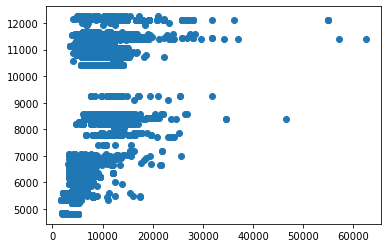

In [66]:
plt.scatter(x=y_test,y=predict_test)

# Random Forest Regressor Model

In [67]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [68]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    rdr.fit(x_train,y_train)
    pred_train=rdr.predict(x_train)
    pred_test=rdr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.7381928373441411
At random state 0,the testing accuracy is:0.6913340926333792


At random state 1,the training accuracy is:0.6979168118962787
At random state 1,the testing accuracy is:0.6637728261975775


At random state 2,the training accuracy is:0.7475535636090265
At random state 2,the testing accuracy is:0.6964951712545513


At random state 3,the training accuracy is:0.7090416463085084
At random state 3,the testing accuracy is:0.6923849121466221


At random state 4,the training accuracy is:0.7149761753869839
At random state 4,the testing accuracy is:0.7205418881933975


At random state 5,the training accuracy is:0.7302994390085973
At random state 5,the testing accuracy is:0.6913512676406204


At random state 6,the training accuracy is:0.7625488233929896
At random state 6,the testing accuracy is:0.6909214690085892


At random state 7,the training accuracy is:0.7339819905160854
At random state 7,the testing accuracy is:0.7010575381434127




In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=4)
rdr.fit(x_train,y_train)

RandomForestRegressor()

In [70]:
pred=rdr.predict(x_test)

In [71]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df

Actual     Predicted
4543     8266  10897.063871
3326     7662   8337.219259
9497    13587  10897.063871
2642    10262  10694.209336
528      3398   4093.114550
8646    14871   7199.578586
4983     8586   9683.996124
9034    14714  15193.689608
262      4462   4796.827826
9733     7064   9683.996124
7502     6860   5215.243934
4054     3625   4068.036559
7692    14588  11330.304409
1722    12224  12163.318709
10604    4319   3908.226732
5368     3943   4398.846367
8361     6216   6601.545845
2546    12537  10897.063871
677     13292  13985.995047
3120    14571  13633.292609
5285    13377  10897.063871
6478     5704   8993.922951
6374     3943   4398.846367
4145     8614  10897.063871
4833    14151  13633.292609
1261    12898  10694.209336
4140     6297   4458.877259
9701    11200  10897.063871
7583    15200  10897.063871
1572     3332   3545.091765
4461     3543   3545.091765
7298     3175   3581.026013
7954     5277   4458.877259
526     12898  10694.209336
10182   23677   9448.414409
3060     5674   6061.686584
3068     3858   4458.877259
7214     5699   5847.574864
4722    13843  10694.209336
6433     9929   8993.922951
5959    12351   7199.578586
4738    15135  10897.063871
9013    14571  13633.292609
5707     7408  10897.063871
2286     7485  10897.063871
385      3384   4097.353503
9572    11924  10694.209336
8554     7832  10056.646335
4063    10577  10694.209336
5957     6795  10897.063871
4199     8452   9334.769229
6502     5678   6642.785095
4538    10924   9448.414409
4773     4804   4796.827826
10341   10844   9683.996124
2730    10661   9683.996124
6652     5170   5847.574864
7971    10231  11330.304409
158     10844   9683.996124
4704     6587   8993.922951
3644    10262  10694.209336
9751     3898   4093.114550
1235     3543   3545.091765
6678     7670  10897.063871
6280     6117  12163.318709
4372    10262  10694.209336
5480    13942  13041.213040
3728    10368  11379.371851
10358   11982   8025.028658
10005    9149  10897.063871
1578    11087  10056.646335
5300     3625   4398.846367
5498     5403   5055.142450
1792    14151  13633.292609
10501    6442   7199.578586
6112     9064   8993.922951
7257     4784   3581.026013
1627     7452   8337.219259
2878     4140  12293.982286
2319     7048   7199.578586
4238     9187   9334.769229
4693     7503   7199.578586
7096     5678   6642.785095
8708     3597   4097.353503
3320     6151   8093.701192
4885     4622   4244.675316
7875    11087  10056.646335
1301     3100   3164.490035
7966     5601   5651.331110
5869     4423   4398.846367
8077    14714  15193.689608
6700     4174   4244.675316
8523     7480   8993.922951
2992    12898  10694.209336
955     13941  13633.292609
5230     5177  10694.209336
7602    10027   9334.769229
5305     6104   7199.578586
2277    14151  13633.292609
1594     6027   7199.578586
6948     3858   4458.877259
8308    12649   7200.413997
3181     4423   4398.846367
7069    12257  11330.304409
10168   16108  10897.063871
2999    13882  13985.995047
10519    3841   3898.469509
4355     2227   3581.026013
9008    13377  10897.063871
9971     3943   4398.846367
7392    15385   3164.490035
3726     9345   9334.769229
6106     6442   7199.578586
3085     2470   3808.428034
6378    10276  10897.063871
9158    14237  13985.995047
2595     9653  11330.304409
2689     5000   5651.331110
5691    11071  11330.304409
832      9103  10897.063871
3219     7317   5704.072892
5297    10844   9683.996124
991     11791  13041.213040
4630     3311   4068.036559
5326    13067  13633.292609
1803    13817  18321.606213
8480     4409   4473.445033
3645    10262  10694.209336
4934    14571  13633.292609
9522     4409   4473.445033
9486    10844   9683.996124
8350     8355  13633.292609
1153     7723  10897.063871
66       5403   5055.142450
8596     6794   7199.578586
4169     8016   7533.747001
2121     6220   6814.477692
2764     4591   4398.846367
8495     4823   4398.846367
3046     3873   4244.675316
2086    15554  15193.689608
8423    11399  10694.209336
409

In [72]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1520.7252977173341
Mean squared error: 5800340.976374623
Root mean squared error: 2408.3897060846743


In Random Forest Regressor model, The root mean squared error value is high when comapred with Decision tree regressor.

In [73]:
predict_test=rdr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

71.96675046364967


In [74]:
predict_train=rdr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

71.56062153086577


The Cross validation score for Random Forest Regressor Model

In [75]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.7035106211076598 and accuracy score for training is 0.7156062153086578 and accuracy score  for testing is 0.7196675046364968


At cross fold(j) the cv score is 0.7011901275063389 and accuracy score for training is 0.7156062153086578 and accuracy score  for testing is 0.7196675046364968


At cross fold(j) the cv score is 0.7095163862120877 and accuracy score for training is 0.7156062153086578 and accuracy score  for testing is 0.7196675046364968


At cross fold(j) the cv score is 0.7087173813358932 and accuracy score for training is 0.7156062153086578 and accuracy score  for testing is 0.7196675046364968


At cross fold(j) the cv score is 0.7100946304446248 and accuracy score for training is 0.7156062153086578 and accuracy score  for testing is 0.7196675046364968


At cross fold(j) the cv score is 0.7113279504815347 and accuracy score for training is 0.7156062153086578 and accuracy score  for testing is 0.7196675046364968


At cross fold(j) the cv scor

The Cross validation score of flight ticket price for training & testing accuracy score is 71% & 71% respectively.

Lets plot with y_test vs prediction

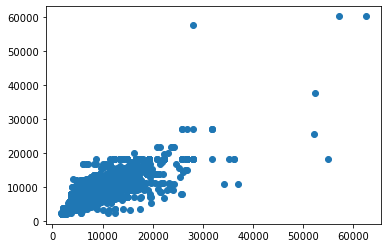

In [76]:
plt.scatter(x=y_test,y=predict_test)

# Decision Tree Regressor Model

In [77]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [78]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.7431485286318541
At random state 0,the testing accuracy is:0.6882118102583764


At random state 1,the training accuracy is:0.6990100846262113
At random state 1,the testing accuracy is:0.6499085008705183


At random state 2,the training accuracy is:0.757299999368602
At random state 2,the testing accuracy is:0.7094160817591652


At random state 3,the training accuracy is:0.7112340466610103
At random state 3,the testing accuracy is:0.6861215486228216


At random state 4,the training accuracy is:0.7226291870333854
At random state 4,the testing accuracy is:0.7012770097889822


At random state 5,the training accuracy is:0.7336139906041153
At random state 5,the testing accuracy is:0.6832302000432452


At random state 6,the training accuracy is:0.7699045568672216
At random state 6,the testing accuracy is:0.6776960376996034


At random state 7,the training accuracy is:0.7433400322002832
At random state 7,the testing accuracy is:0.6962334021246486


A

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=2)
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [80]:
pred=dtr.predict(x_test)

In [81]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df

Actual     Predicted
2177     6015   6123.466667
4904     8844   7258.117647
8355     3100   3502.476190
10469    3597   4991.500000
2589    11491  11626.252427
4352     5224   4813.333333
10538    8586   9806.150754
1246    26890  18162.393939
6691     9535   9136.500000
208     10844   9806.150754
9165    14924  15247.836538
8338     9134   9247.395349
1737     3850   4556.604167
10138    5628   6985.583333
7810    17024  15247.836538
6606    12488  11626.252427
825     15554  15247.836538
9579    13626  13639.768817
6310     6206   7332.308458
526     12898  10812.275000
8644     3597   4991.500000
6489     4282   4026.720000
1550    12898  10812.275000
8545    10844   9806.150754
6573     3100   3502.476190
6473    14781  13639.768817
7510     6860   7284.178571
2006     7927   9631.735849
8345    13029  11396.809524
7106     4423   3958.363636
5425     5277   4556.604167
4692     7888  10855.487342
3575    11622  10855.487342
7277    10651  11626.252427
9232     8016   7445.717391
7042     3841   3957.705882
9194     2227   3837.935484
42      12373  10812.275000
7071    10008  12215.000000
3721    11682   9631.735849
3783    15318  11396.809524
7912    10368  11396.809524
9066     5228   5989.600000
4271    14300  14325.507692
650      4226   5196.621622
7001    14221  13230.000000
2612    13044  13639.768817
5932     6991   5196.621622
4140     6297   4556.604167
8391     8996   8079.520000
7029    13941  13639.768817
8806    16289  15247.836538
6467     3100   3502.476190
10210    6535   8079.520000
9655     7845  10855.487342
6475     9481   8016.777778
7495    12373  10812.275000
7856    12898  10812.275000
4117    10366   9136.500000
3672    12681  13639.768817
8736     9663   9806.150754
1742    13377  10855.487342
2735    10676  12454.672897
5147    12898  10812.275000
8908     7832   9247.395349
3723    10262  10812.275000
712     10976  14325.507692
9481     3943   4364.666667
5834     5201   3957.705882
3944     3311   3958.363636
460      9736  10855.487342
7563     4409   4454.615385
8279     3574   5196.621622
3789     5403   5134.395349
1219     5298   7332.308458
39      14924  15247.836538
4100     7229   7445.717391
6553     4174   4813.333333
3124    10262  10812.275000
188      4804   4813.333333
2887     7670  10855.487342
6960     6860   7284.178571
4241     8016   7445.717391
9038     5000   6123.466667
191      7165   9023.710843
6568    10031   9806.150754
9637    18804  14325.507692
9729     8577  11626.252427
4228     9838  10855.487342
1088    13014  14325.507692
8738    10151  12454.672897
6350     6722   4000.409091
2916    12592  12454.672897
1030    14483  11626.252427
5390     7670  10855.487342
2623    18293  16359.750000
4464     6496   7332.308458
617      7438  10812.275000
5778     5298   7332.308458
4607     6673  10855.487342
5300     3625   4364.666667
659      4668   5134.395349
1462     9165   7332.308458
3634    11134   9806.150754
7430     5618   4813.333333
319      4148   4813.333333
6334     3919   3928.096774
975     26890  18162.393939
8089     6427  10855.487342
7313    14781  13639.768817
2447    14714  15247.836538
6997    10031   9806.150754
1374    14067  10855.487342
6879     5232   3837.935484
6621     3898   6531.000000
2024    11848  10812.275000
9126    12373  10812.275000
577      5515   4078.327586
5444     7229   7445.717391
2321    10573  12209.000000
5080     8216   7332.308458
5576     9417  11626.252427
6942     3597   4556.604167
4980    14781  13639.768817
9381     8528   9136.500000
230     14641   8079.520000
3978    14714  15247.836538
5449    16736  18162.393939
1616     7480   9023.710843
7887     9134   9247.395349
7706     4268   5196.621622
8863    10844   9806.150754
6227    14781  13639.768817
7870    14714  15247.836538
7318    11507  11396.809524
480      8529   9806.150754
1734     5636   7332.308458
7644     7740  10855.487342
3194     9794  10855.487342
3875    12284  18162.393939
4702    12080  12215.000000
9043    13033  12454.672897
229

In [82]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1555.5688657831708
Mean squared error: 6292948.63921597
Root mean squared error: 2508.575021643955


In Decision Tree Regressor model, The Root mean squared error value is slightly better when compare with linear regressor model.but still we should compare with more model.

In [83]:
predict_test=dtr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

70.93536041570329


In [84]:
predict_train=dtr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

75.72999993686021


The Cross validation score for Decision Tree Regressor model

In [85]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.6745256333603571 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is 0.7093536041570329


At cross fold(j) the cv score is 0.6895940700129645 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is 0.7093536041570329


At cross fold(j) the cv score is 0.697037866264544 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is 0.7093536041570329


At cross fold(j) the cv score is 0.6971369582414578 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is 0.7093536041570329


At cross fold(j) the cv score is 0.6986424159431118 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is 0.7093536041570329


At cross fold(j) the cv score is 0.6981900808290288 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is 0.7093536041570329


At cross fold(j) the cv score is 0.

The Cross validation score of flight ticket price for training & tesing accuracy score is 75% & 70% respectively.

Lets plot with y_test vs prediction

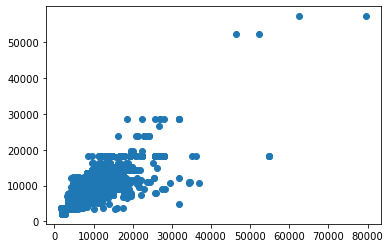

In [86]:
plt.scatter(x=y_test,y=predict_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

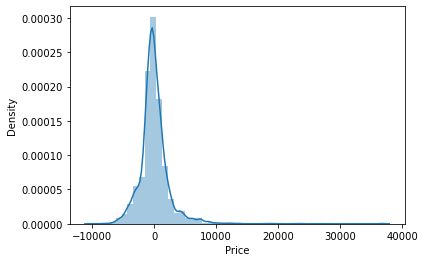

In [87]:
sns.distplot((y_test-predict_test),bins=50)

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

# Hyper Parameter Tuning

Hyper Parameter Tuning for Linear Regression

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [89]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)
lss=r2_score(y_test,pred_decision)
print('R2 Score:',lss*100)
lsscore=cross_val_score(ls,x,y,cv=5)
lsc=lsscore.mean()
print('Cross Val Score:',lsc*100)

R2 Score: 24.473892502230743
Cross Val Score: 24.65128070356067


Hyper Parameter Tuning for Decision Tree Regressor

In [90]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),'random_state':list(range(0,10))}
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [91]:
GCV.best_params_

{'max_depth': 12, 'random_state': 9}

In [92]:
dtr=DecisionTreeRegressor(max_depth=12,random_state=9)

dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_decision=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_decision)
print('R2 Score:',dtrs*100)
dtrscore=cross_val_score(dtr,x,y,cv=5)
dtrc=dtrscore.mean()
print('Cross Val Score:',dtrc*100)

R2 Score: 70.94160817591651
Cross Val Score: 69.71528054658961


Hyper Parameter Tuning for Random Forest Regressor

In [93]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'random_state':list(range(0,10))}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt', 'random_state': 3}


In [94]:
rdr=RandomForestRegressor(criterion='mse',max_features='log2')
rdr.fit(x_train,y_train)
rdr.score(x_train,y_train)
pred_decision=rdr.predict(x_test)
rdrs=r2_score(y_test,pred_decision)
print('R2 Score:',rdrs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rdrc=rdrscore.mean()
print('Cross Val Score:',rdrc*100)

R2 Score: 69.07893478131462
Cross Val Score: 71.4599749369906


Compare with Actual Final Vs Sample Prediction

Y Test    Prediction
2177     6015   6123.466667
4904     8844   7258.117647
8355     3100   3502.476190
10469    3597   4991.500000
2589    11491  11626.252427

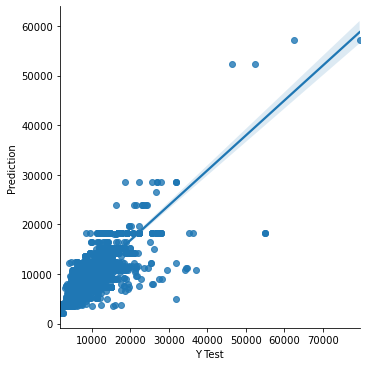

In [95]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':predict_test},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

# Model Saving

In [98]:
import pickle
filename='Flight Price Prediction.pkl'
pickle.dump(dtr, open(filename, 'wb'))

# Conclusion

In [99]:
loaded_model = pickle.load(open('Flight Price Prediction.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

70.94160817591651


In [100]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

0            1            2           3             4     \
Predicted  6123.466667  7258.117647  3502.476190  4991.50000  11626.252427   
Original   6115.260426  7230.428883  3513.364888  4920.42034  11631.749051   

                  5            6             7             8            9     \
Predicted  4813.333333  9806.150754  18162.393939   9136.500000  9806.150754   
Original   4814.257694  9805.247872  18237.545342  10109.572516  9805.247872   

           ...          7469          7470         7471         7472  \
Predicted  ...  10855.487342  10855.487342  3928.096774  3693.666667   
Original   ...  10848.740926  10848.740926  3932.117719  3737.632975   

                  7473         7474          7475          7476         7477  \
Predicted  6123.466667  4813.333333  10855.487342  10855.487342  5196.621622   
Original   6115.260426  4814.257694  10848.740926  10848.740926  5206.806134   

                  7478  
Predicted  4813.333333  
Original   4814.257694  

[2 rows x 7479 columns]